<a href="https://colab.research.google.com/github/Mediatripai/Assignment_II/blob/main/run_yolo_v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Installtion

!pip install numpy>=1.18.5
!pip install opencv-python>=4.1.2
!pip install Pillow
!pip install PyYAML>=5.3.1
!pip install scipy>=1.4.1
!pip install torchvision>=0.8.1
!pip install tensorflow>=2.4.1


In [4]:
# download image and coco yaml file from here
!wget https://drive.google.com/file/d/17INCjxMcI8MzBeaWXm9g4DYUxn9AIzva/view?usp=sharing

!wget https://drive.google.com/file/d/1IaQAmzv2v7Fnwqpiy-42CVdETkooxH64/view?usp=sharing



--2024-09-10 18:10:31--  https://drive.google.com/file/d/17INCjxMcI8MzBeaWXm9g4DYUxn9AIzva/view?usp=sharing
Resolving drive.google.com (drive.google.com)... 74.125.204.113, 74.125.204.138, 74.125.204.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.204.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘view?usp=sharing’

view?usp=sharing        [ <=>                ]  86.50K  --.-KB/s    in 0.04s   

2024-09-10 18:10:33 (2.25 MB/s) - ‘view?usp=sharing’ saved [88581]

--2024-09-10 18:10:33--  https://drive.google.com/file/d/1IaQAmzv2v7Fnwqpiy-42CVdETkooxH64/view?usp=sharing
Resolving drive.google.com (drive.google.com)... 74.125.204.113, 74.125.204.138, 74.125.204.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.204.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘view?usp=sharing.1’

view?usp=sharing.1      [ <=>              

In [7]:
import argparse
from pathlib import Path
import tensorflow as tf
import cv2
import torch
import yaml
import numpy as np
import torchvision
import time
import os
import glob

img_formats = ['bmp', 'jpg', 'jpeg', 'png', 'tif', 'tiff', 'dng', 'webp', 'mpo']  # acceptable image suffixes
vid_formats = ['mov', 'avi', 'mp4', 'mpg', 'mpeg', 'm4v', 'wmv', 'mkv']  # acceptable video suffixes

def dataset_letterbox(img, new_shape=(640, 640), color=(114, 114, 114), auto=True, scaleFill=False, scaleup=True, stride=32):
    # Resize and pad image while meeting stride-multiple constraints
    shape = img.shape[:2]  # current shape [height, width]
    if isinstance(new_shape, int):
        new_shape = (new_shape, new_shape)

    # Scale ratio (new / old)
    r = min(new_shape[0] / shape[0], new_shape[1] / shape[1])
    if not scaleup:  # only scale down, do not scale up (for better test mAP)
        r = min(r, 1.0)

    # Compute padding
    ratio = r, r  # width, height ratios
    new_unpad = int(round(shape[1] * r)), int(round(shape[0] * r))
    dw, dh = new_shape[1] - new_unpad[0], new_shape[0] - new_unpad[1]  # wh padding
    if auto:  # minimum rectangle
        dw, dh = np.mod(dw, stride), np.mod(dh, stride)  # wh padding
    elif scaleFill:  # stretch
        dw, dh = 0.0, 0.0
        new_unpad = (new_shape[1], new_shape[0])
        ratio = new_shape[1] / shape[1], new_shape[0] / shape[0]  # width, height ratios

    dw /= 2  # divide padding into 2 sides
    dh /= 2

    if shape[::-1] != new_unpad:  # resize
        img = cv2.resize(img, new_unpad, interpolation=cv2.INTER_LINEAR)
    top, bottom = int(round(dh - 0.1)), int(round(dh + 0.1))
    left, right = int(round(dw - 0.1)), int(round(dw + 0.1))
    img = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)  # add border
    return img, ratio, (dw, dh)

class LoadImages:  # for inference
    def __init__(self, path, img_size=640, stride=32, auto=True):
        p = str(Path(path).absolute())  # os-agnostic absolute path
        if '*' in p:
            files = sorted(glob.glob(p, recursive=True))  # glob
        elif os.path.isdir(p):
            files = sorted(glob.glob(os.path.join(p, '*.*')))  # dir
        elif os.path.isfile(p):
            files = [p]  # files
        else:
            raise Exception(f'ERROR: {p} does not exist')

        images = [x for x in files if x.split('.')[-1].lower() in img_formats]
        videos = [x for x in files if x.split('.')[-1].lower() in vid_formats]
        ni, nv = len(images), len(videos)

        self.img_size = img_size
        self.stride = stride
        self.files = images + videos
        self.nf

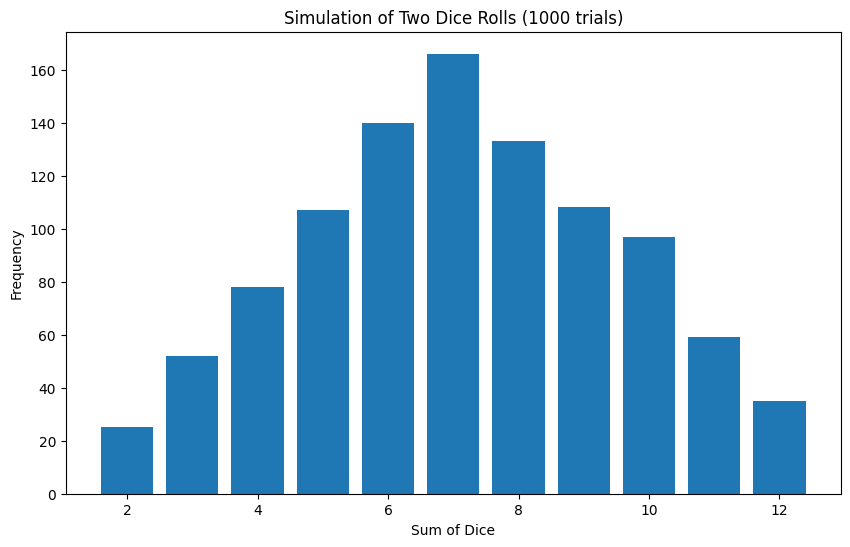

In [8]:
# prompt: Create a program that will run a simulation of two dice rolling 1000 with a visualization

import random
import matplotlib.pyplot as plt

# Initialize lists to store results
results = []
counts = [0] * 11  # To store counts for each sum (2 to 12)

# Simulate 1000 dice rolls
for _ in range(1000):
  die1 = random.randint(1, 6)
  die2 = random.randint(1, 6)
  total = die1 + die2
  results.append(total)
  counts[total - 2] += 1

# Create a bar chart visualization
plt.figure(figsize=(10, 6))
plt.bar(range(2, 13), counts)
plt.xlabel("Sum of Dice")
plt.ylabel("Frequency")
plt.title("Simulation of Two Dice Rolls (1000 trials)")
plt.show()
